In [3]:
import pandas as pd
import numpy as np

from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

df = pd.read_csv("../data/5. label 지정 완료.csv",encoding='cp949')

In [4]:
df['매출액증가율'] = winsorize(df['매출액증가율'], limits= (0, 0.01))
df['유형자산증가율'] = winsorize(df['유형자산증가율'], limits= (0, 0.01))
df['재고자산증가율'] = winsorize(df['재고자산증가율'], limits= (0, 0.01))
df['비유동자산증가율'] = winsorize(df['비유동자산증가율'], limits= (0, 0.01))
df['유동자산증가율'] = winsorize(df['유동자산증가율'], limits= (0, 0.01))
df['자기자본증가율'] = winsorize(df['자기자본증가율'], limits= (0, 0.01))
df['총자본증가율'] = winsorize(df['총자본증가율'], limits= (0, 0.01))
df['순이익증가율'] = winsorize(df['순이익증가율'], limits= (0., 0.01))

df['매출액총이익률'] = winsorize(df['매출액총이익률'], limits= (0.01, 0))
df['매출액순이익률'] = winsorize(df['매출액순이익률'], limits= (0.0075,0.0025))
df['자기자본순이익률'] = winsorize(df['자기자본순이익률'], limits= (0.0075,0.0025))
df['총자본사업이익률'] = winsorize(df['총자본사업이익률'], limits= (0.01, 0))
df['총자본순이익률'] = winsorize(df['총자본순이익률'], limits= (0.01, 0))

df['1주당매출액'] = winsorize(df['1주당매출액'], limits= (0, 0.01))

df['1주당순이익'] = winsorize(df['1주당순이익'], limits= (0.005, 0.005))

df['유동비율'] = winsorize(df['유동비율'], limits= (0, 0.01))
df['당좌비율'] = winsorize(df['당좌비율'], limits= (0, 0.01))
df['현금비율'] = winsorize(df['현금비율'], limits= (0, 0.01))

df['순운전자본비율'] = winsorize(df['순운전자본비율'], limits= (0.01, 0))

df['부채비율'] = winsorize(df['부채비율'], limits= (0, 0.01))
df['이자보상배율이자비용'] = winsorize(df['이자보상배율이자비용'], limits= (0.005, 0.005))
df['비유동비율'] = winsorize(df['비유동비율'], limits= (0, 0.01))
df['유동자산구성비율'] = winsorize(df['유동자산구성비율'], limits= (0.005, 0.005))
df['자기자본구성비율'] = winsorize(df['자기자본구성비율'], limits= (0.01, 0))

df['자기자본배율'] = winsorize(df['자기자본배율'], limits= (0, 0.01))
df['총자본회전률'] = winsorize(df['총자본회전률'], limits= (0, 0.01))
df['자기자본회전률'] = winsorize(df['자기자본회전률'], limits= (0, 0.01))
df['비유동자산회전률'] = winsorize(df['비유동자산회전률'], limits= (0, 0.01))
df['재고자산회전률'] = winsorize(df['재고자산회전률'], limits= (0, 0.01))
df['매출채권회전률'] = winsorize(df['매출채권회전률'], limits= (0, 0.01))

df['매입채무회전률'] = winsorize(df['매입채무회전률'], limits= (0, 0.01))
df['매입채무회전기간'] = winsorize(df['매입채무회전기간'], limits= (0, 0.01))
df['재고자산회전기간'] = winsorize(df['재고자산회전기간'], limits= (0, 0.01))
df['매출채권회전기간'] = winsorize(df['매출채권회전기간'], limits= (0, 0.01))
df['1회전기간'] = winsorize(df['1회전기간'], limits= (0, 0.01))
df['운전자본회전률'] = winsorize(df['운전자본회전률'], limits= (0, 0.01))

df['순운전자본회전률'] = winsorize(df['순운전자본회전률'], limits= (0, 0.01))
df['유형자산회전율'] = winsorize(df['유형자산회전율'], limits= (0, 0.01))
df['유동자산회전률'] = winsorize(df['유동자산회전률'], limits= (0, 0.01))
df['당좌자산회전률'] = winsorize(df['당좌자산회전률'], limits= (0, 0.01))
df['부가가치'] = winsorize(df['부가가치'], limits= (0.01, 0))
df['총자본투자효율'] = winsorize(df['총자본투자효율'], limits= (0.01, 0))

df['설비투자효율'] = winsorize(df['설비투자효율'], limits= (0.0025, 0.0075))
df['기계투자효율'] = winsorize(df['기계투자효율'], limits= (0.0025, 0.0075))
df['부가가치율'] = winsorize(df['부가가치율'], limits= (0.0075, 0.0025))
df['노동소득분배율'] = winsorize(df['노동소득분배율'], limits= (0, 0.01))
df['자본분배율'] = winsorize(df['자본분배율'], limits= (0.0075, 0.0025))
df['이윤분배율'] = winsorize(df['이윤분배율'], limits= (0.0075, 0.0025))

In [5]:
a = ['매출액증가율',
       '유형자산증가율', '재고자산증가율', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '총자본증가율',
       '순이익증가율', '매출액총이익률', '매출액순이익률', '자기자본순이익률', '총자본사업이익률', '총자본순이익률',
       '1주당매출액', '1주당순이익', '유동비율', '당좌비율', '현금비율', '순운전자본비율', '부채비율',
       '이자보상배율이자비용', '비유동비율', '유동자산구성비율', '자기자본구성비율', '자기자본배율', '총자본회전률',
       '자기자본회전률', '비유동자산회전률', '재고자산회전률', '매출채권회전률', '매입채무회전률', '매입채무회전기간',
       '재고자산회전기간', '매출채권회전기간', '1회전기간', '운전자본회전률', '순운전자본회전률', '유형자산회전율',
       '유동자산회전률', '당좌자산회전률', '부가가치', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율']

매출액증가율
유형자산증가율
재고자산증가율
비유동자산증가율
유동자산증가율
자기자본증가율
총자본증가율
순이익증가율
매출액총이익률
매출액순이익률
자기자본순이익률
총자본사업이익률
총자본순이익률
1주당매출액
1주당순이익
유동비율
당좌비율
현금비율
순운전자본비율
부채비율
이자보상배율이자비용
비유동비율
유동자산구성비율
자기자본구성비율
자기자본배율
총자본회전률
자기자본회전률
비유동자산회전률
재고자산회전률
매출채권회전률
매입채무회전률
매입채무회전기간
재고자산회전기간
매출채권회전기간
1회전기간
운전자본회전률
순운전자본회전률
유형자산회전율
유동자산회전률
당좌자산회전률
부가가치
총자본투자효율
설비투자효율
기계투자효율
부가가치율
노동소득분배율
자본분배율
이윤분배율


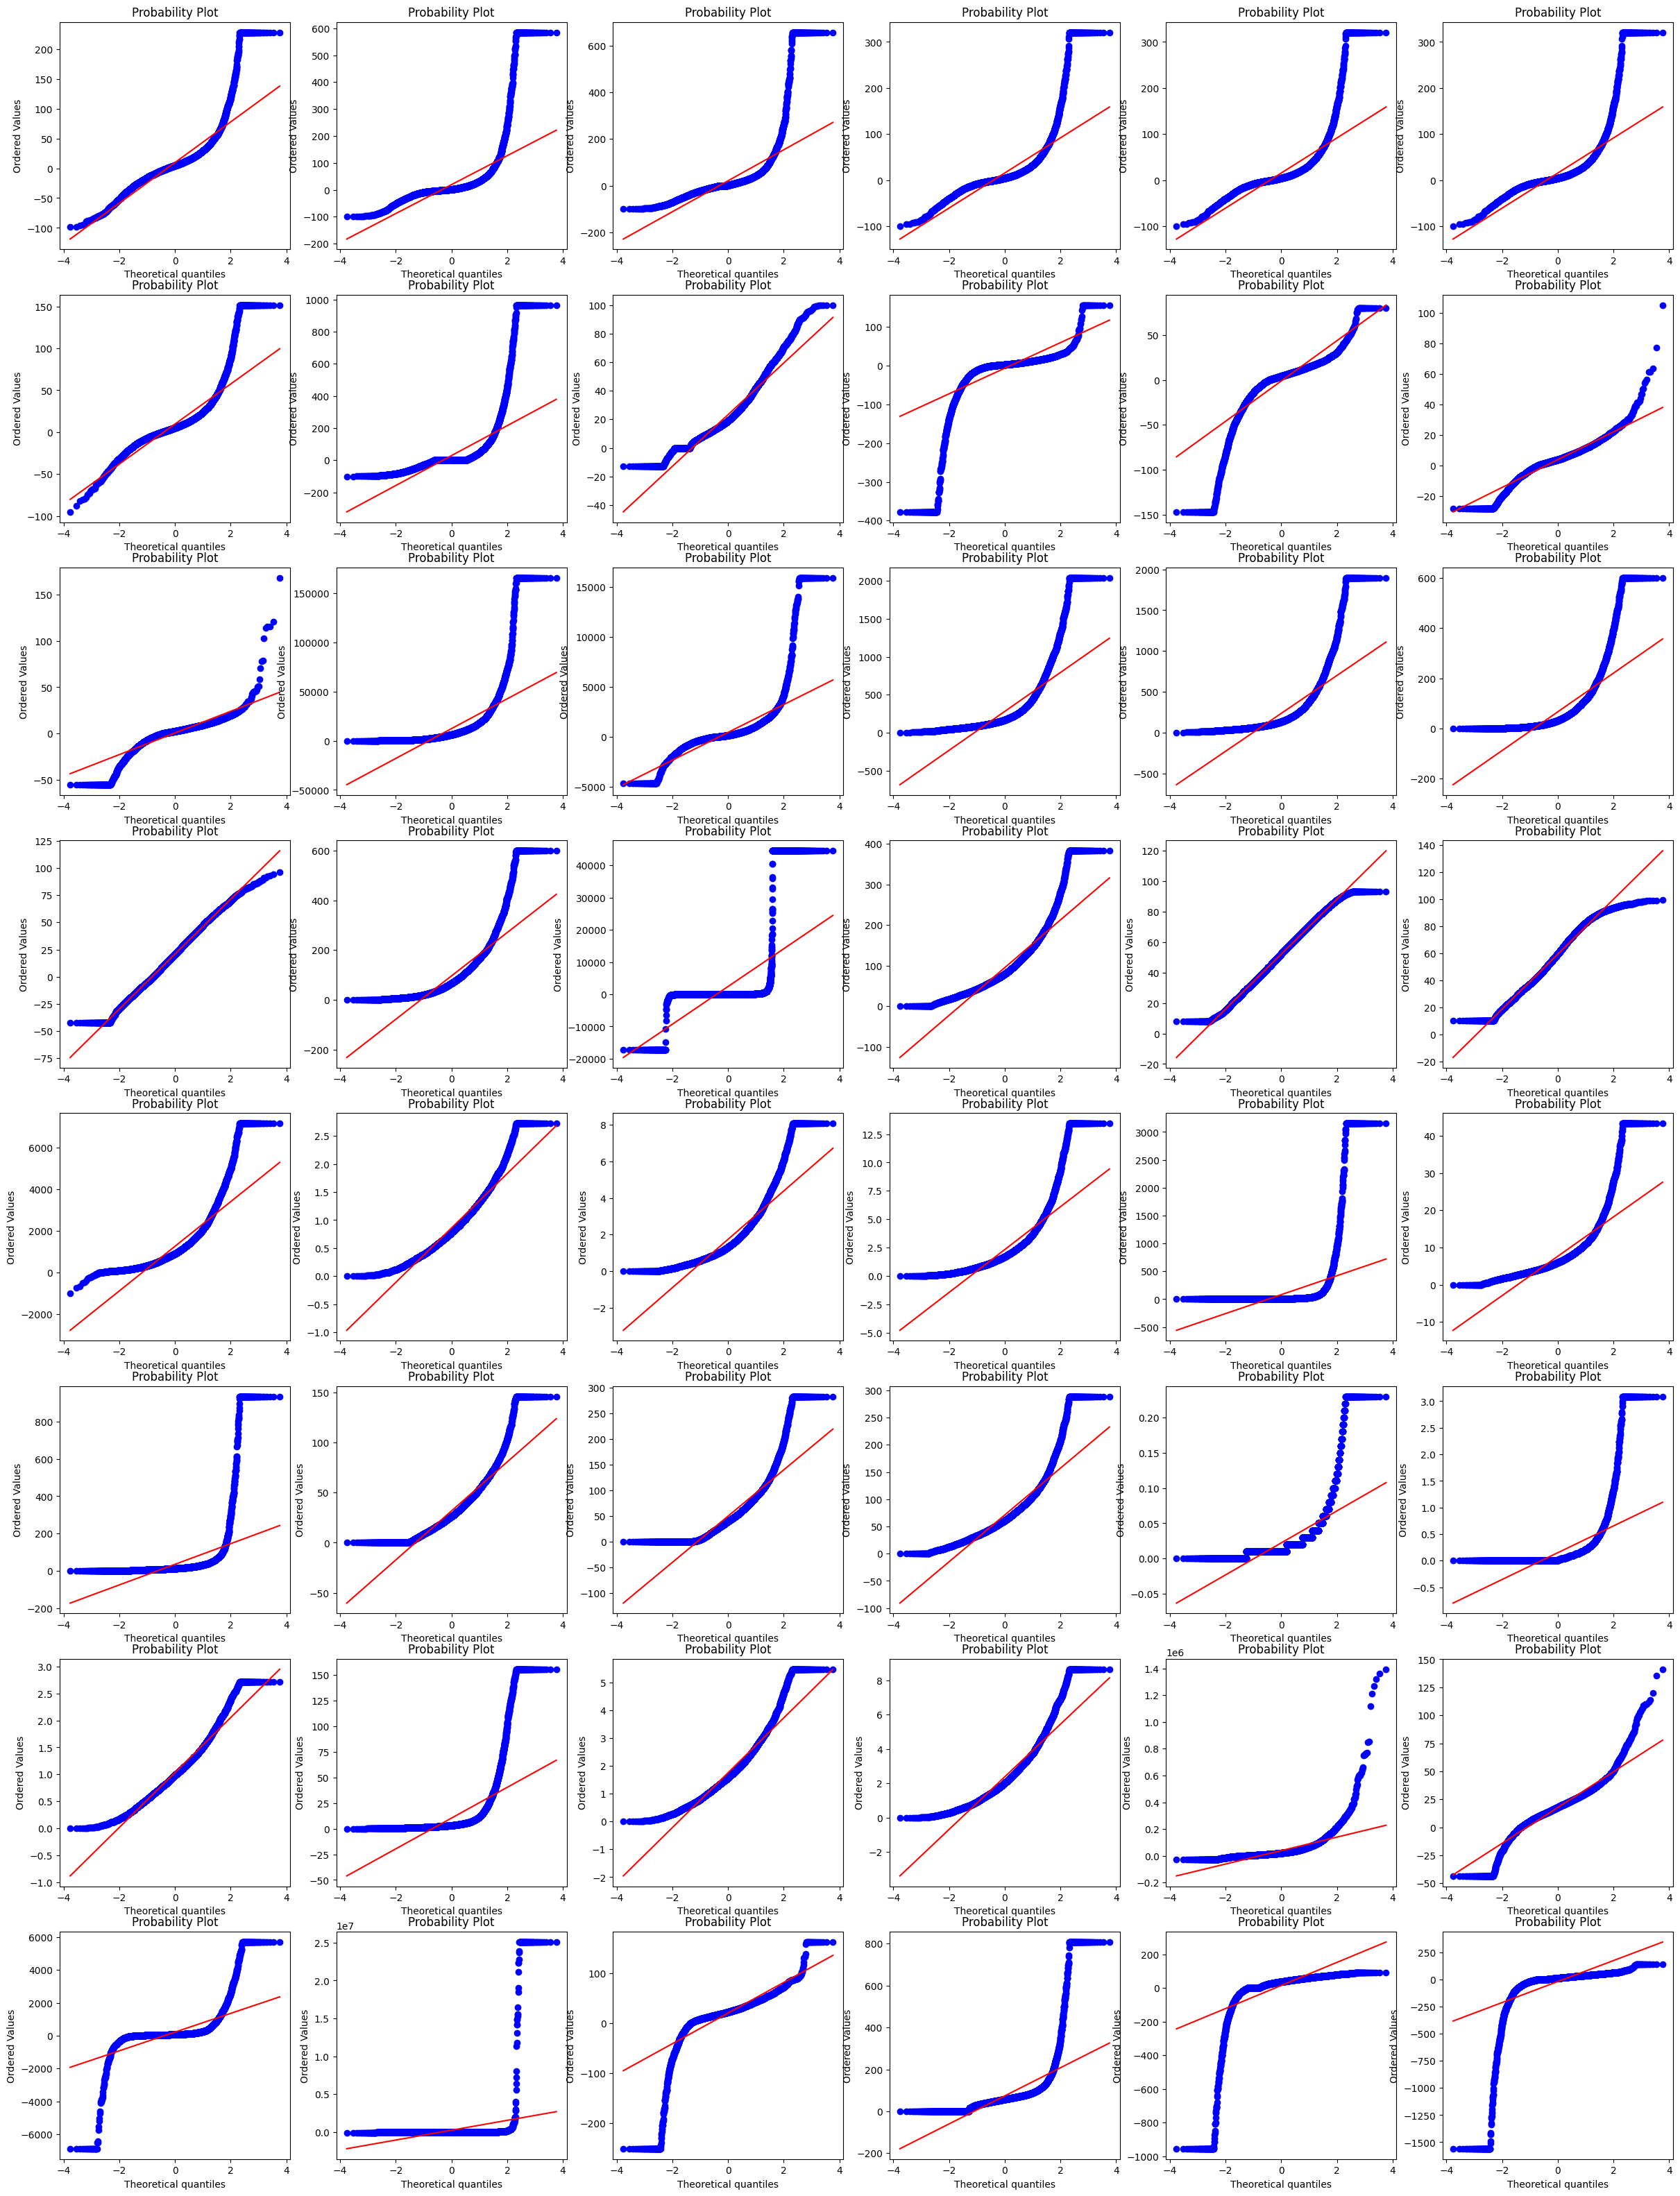

In [6]:
## histogram
col_n = 6
row_n = 8

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(a):
    stats.probplot(df[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)

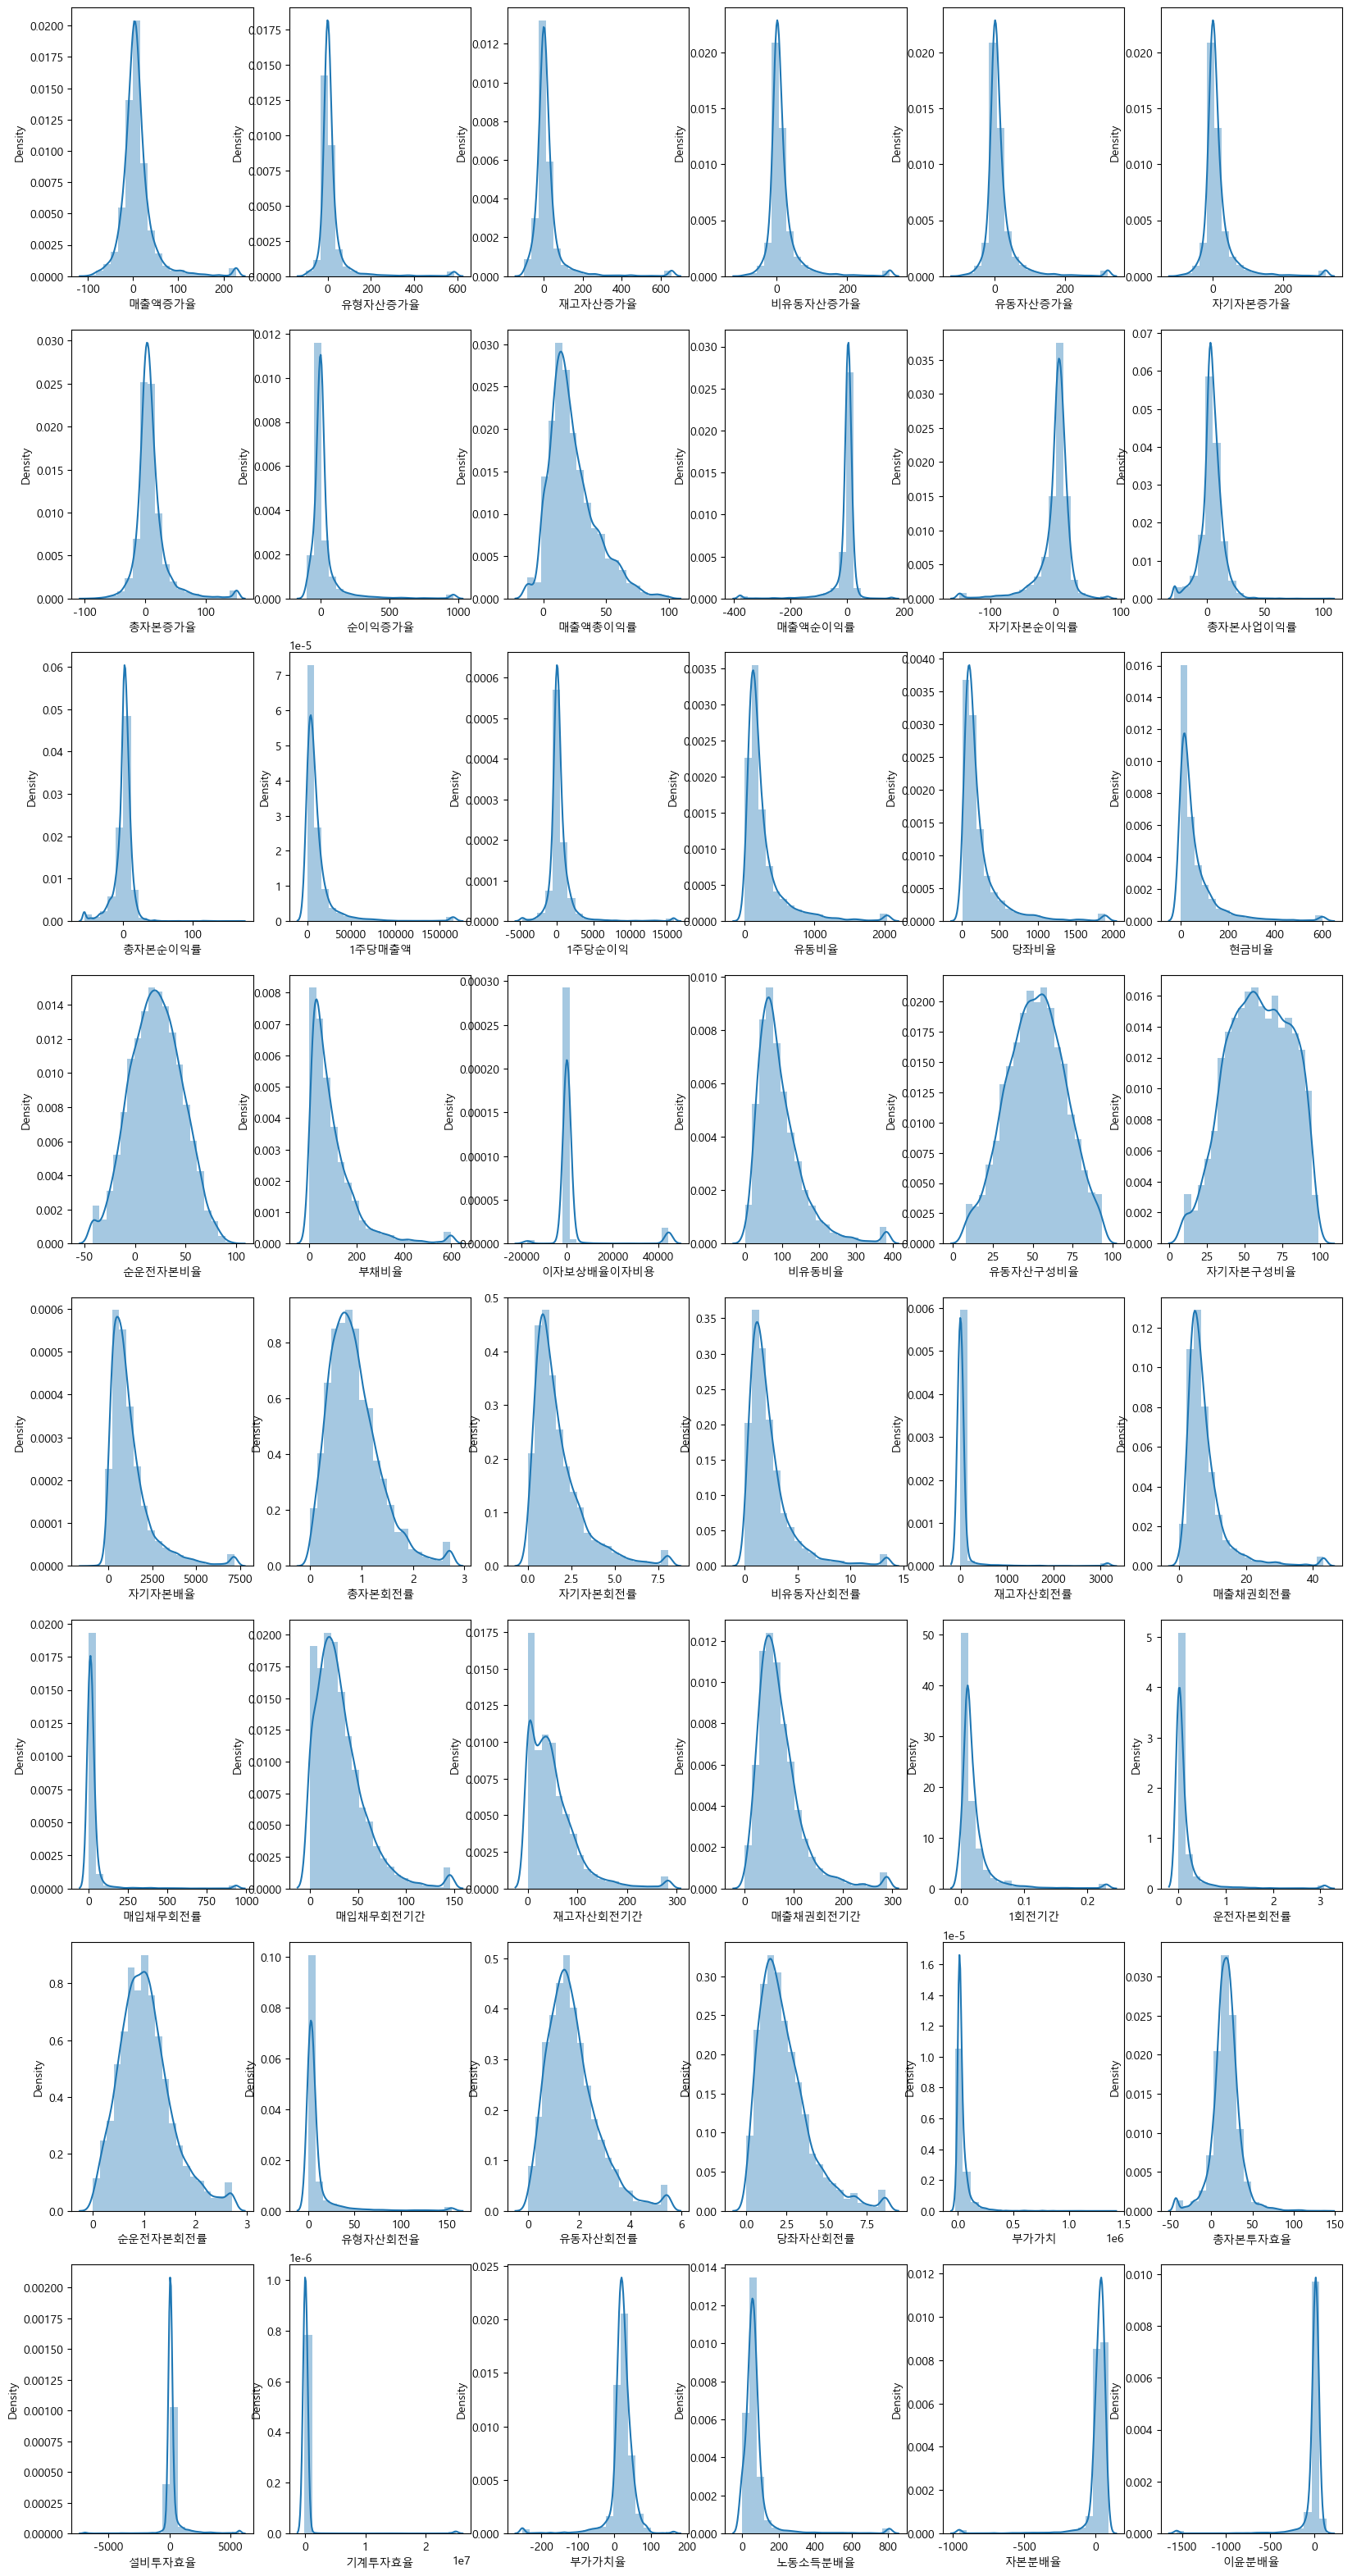

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 6
row_n = 8

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(a):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

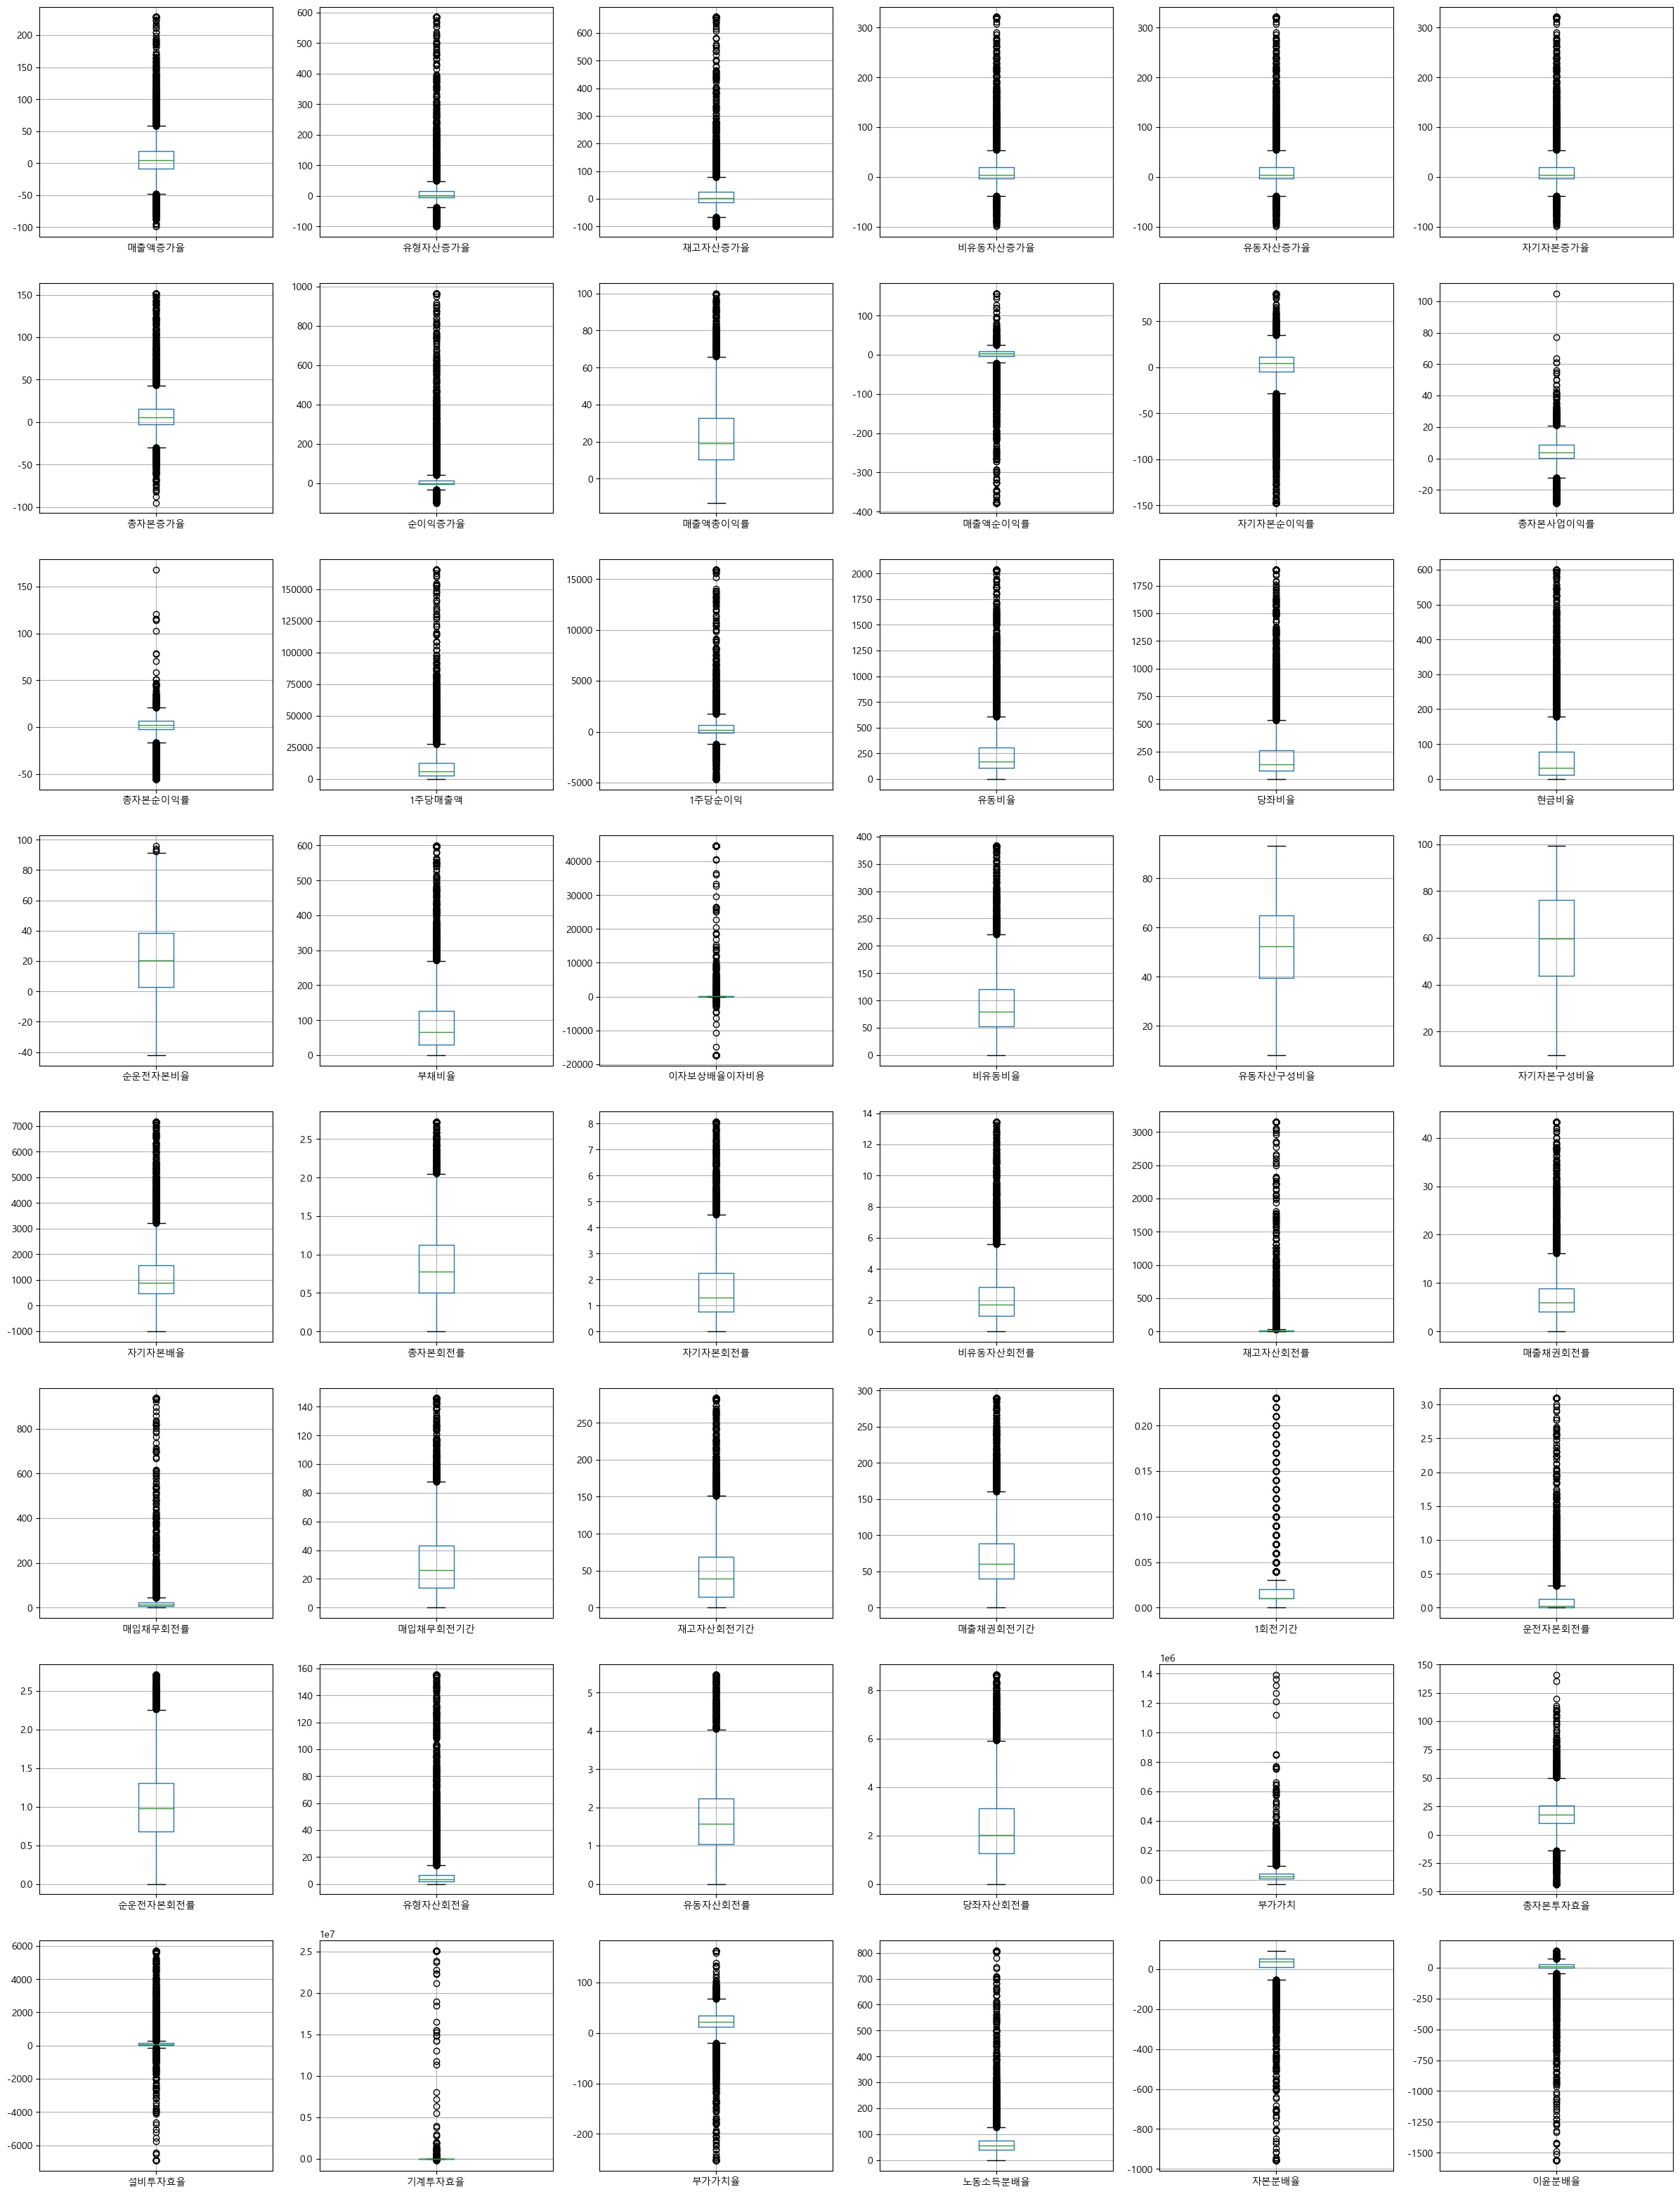

In [8]:
from matplotlib import rc 
import matplotlib.pyplot as plt
col_n = 6
row_n =8

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(a):
    df.boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

매출액증가율
유형자산증가율
재고자산증가율
비유동자산증가율
유동자산증가율
자기자본증가율
총자본증가율
순이익증가율
매출액총이익률
매출액순이익률
자기자본순이익률
총자본사업이익률
총자본순이익률
1주당매출액
1주당순이익
유동비율
당좌비율
현금비율
순운전자본비율
부채비율
이자보상배율이자비용
비유동비율
유동자산구성비율
자기자본구성비율
자기자본배율
총자본회전률
자기자본회전률
비유동자산회전률
재고자산회전률
매출채권회전률
매입채무회전률
매입채무회전기간
재고자산회전기간
매출채권회전기간
1회전기간
운전자본회전률
순운전자본회전률
유형자산회전율
유동자산회전률
당좌자산회전률
부가가치
총자본투자효율
설비투자효율
기계투자효율
부가가치율
노동소득분배율
자본분배율
이윤분배율


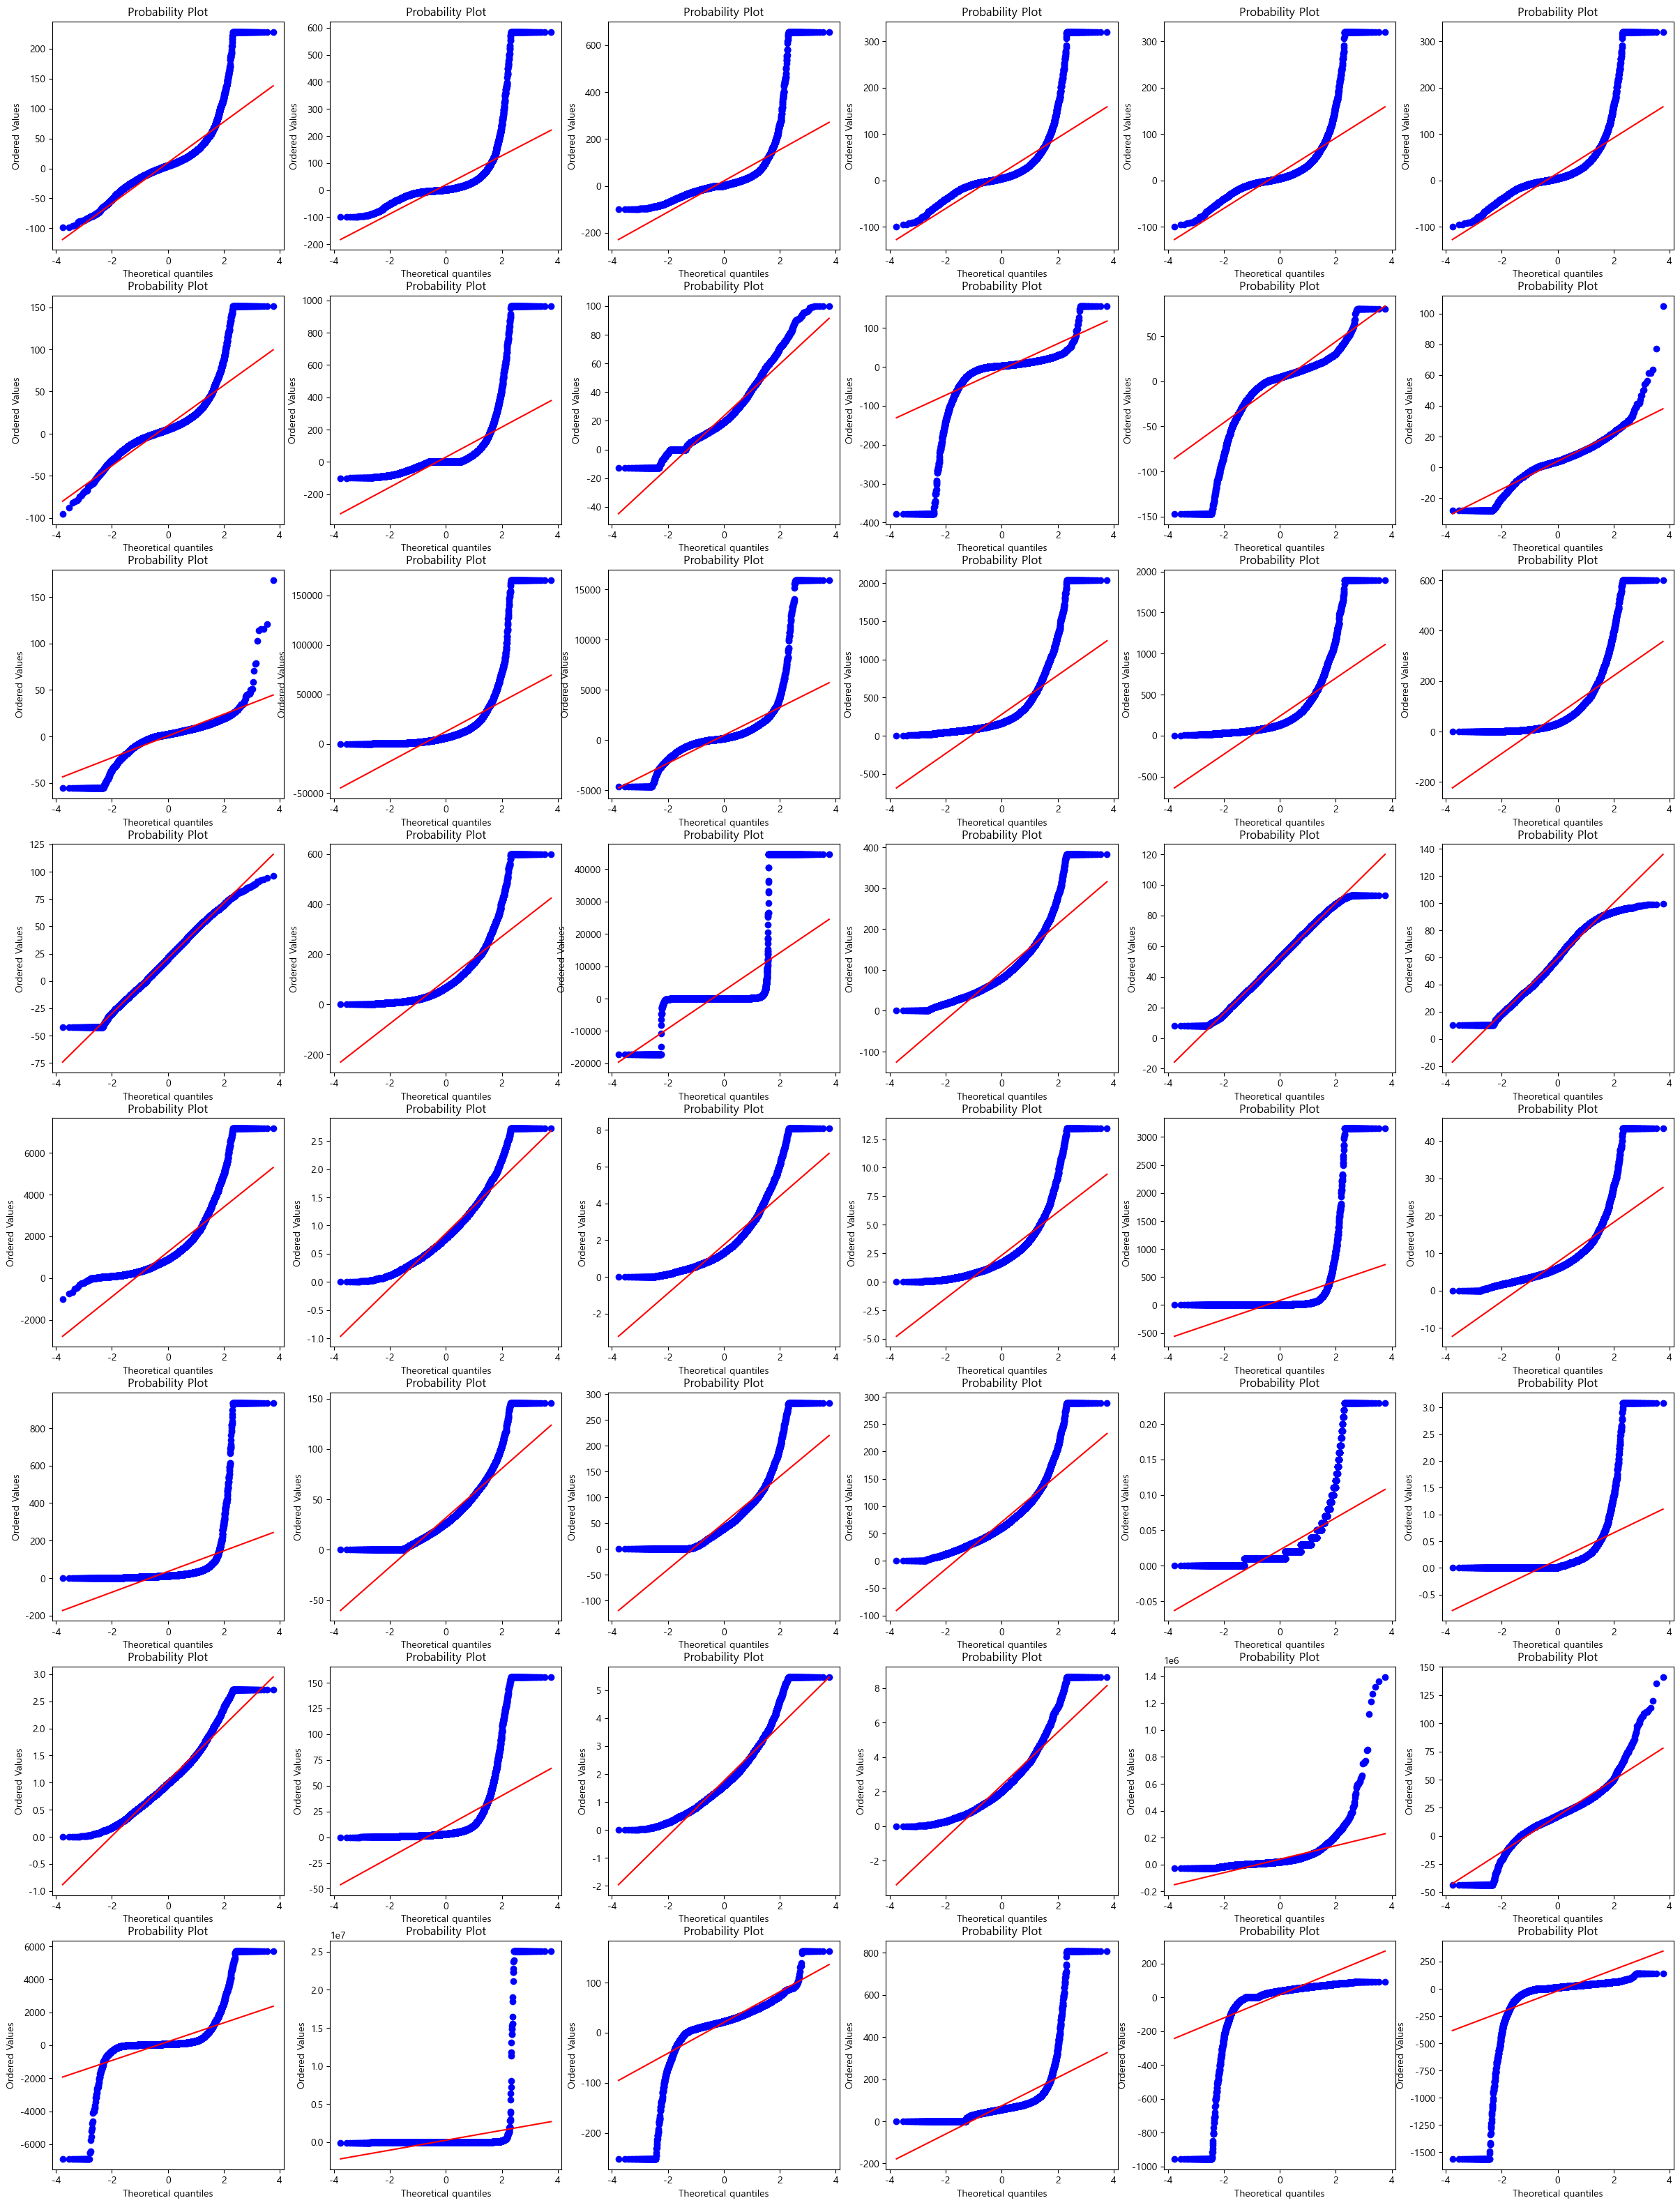

In [9]:
## histogram
col_n = 6
row_n = 8

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(a):
    stats.probplot(df[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)

In [10]:
df.describe()

,거래소코드,소속코드,매출액증가율,유형자산증가율,재고자산증가율,비유동자산증가율,유동자산증가율,자기자본증가율,총자본증가율,순이익증가율,...,당좌자산회전률,부가가치,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,label
count,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,...,8244.000000,8.244000e+03,8244.000000,8244.000000,8.244000e+03,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000
mean,79565.977681,4.999879,9.585826,19.178685,20.901724,15.482203,15.482203,15.482203,9.714478,29.220902,...,2.380152,3.907083e+04,17.698597,216.287504,2.434068e+05,20.226263,73.700613,14.329567,-19.027350,0.034692
std,60304.364189,0.208109,38.667056,79.367784,91.413473,48.134486,48.134486,48.134486,26.921396,136.843973,...,1.619042,7.030426e+04,16.569839,878.541453,2.333625e+06,38.121816,100.204445,114.454686,174.748977,0.183009
min,250.000000,4.000000,-98.900000,-99.710000,-99.960000,-99.470000,-99.470000,-99.470000,-94.940000,-99.910000,...,0.000000,-2.711801e+04,-43.370000,-6887.960000,-1.397572e+05,-251.960000,0.000000,-955.760000,-1559.680000,0.000000
25%,38460.000000,5.000000,-7.942500,-4.912500,-11.682500,-3.650000,-3.650000,-3.650000,-2.540000,-5.470000,...,1.250000,8.667635e+03,9.950000,35.092500,9.407250e+01,12.817500,39.885000,10.100000,0.000000,0.000000
50%,64820.000000,5.000000,4.730000,1.500000,1.430000,4.480000,4.480000,4.480000,5.355000,0.000000,...,2.020000,2.068175e+04,17.915000,70.540000,2.864600e+02,22.255000,57.210000,36.405000,13.045000,0.000000
75%,98660.000000,5.000000,18.420000,16.802500,24.745000,19.492500,19.492500,19.492500,15.780000,13.670000,...,3.120000,4.400677e+04,25.950000,142.630000,1.450233e+03,34.962500,74.745000,52.602500,29.232500,0.000000
max,327260.000000,6.000000,228.070000,584.840000,656.600000,320.890000,320.890000,320.890000,151.510000,964.660000,...,8.650000,1.393639e+06,141.140000,5703.710000,2.508101e+07,162.690000,807.710000,91.260000,137.560000,1.000000


In [11]:
df.to_csv("../data/7. 이상치수정완료.csv", encoding='cp949')